<a href="https://colab.research.google.com/github/evilridersatz/test/blob/main/Car%20Color%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

Pull in respective libraries to prepare the notebook environment.

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-223-g005dcfa Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [2]:
# Ensure we're in the right directory to download our custom dataset
import os
os.makedirs("../datasets/", exist_ok=True)
%cd ../datasets/

/content/datasets


In [4]:
# REPLACE the below with your exported code snippet from above


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="tOgL1FzntFH3qOx63co0")
project = rf.workspace("mario-hernandez").project("color_car-nnmer")
dataset = project.version(1).download("folder")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to color_car-1 in folder:: 100%|██████████| 9047/9047 [00:01<00:00, 7967.10it/s]


In [5]:
#Save the dataset name to the environment so we can use it in a system call later
dataset_name = dataset.location.split(os.sep)[-1]
os.environ["DATASET_NAME"] = dataset_name

In [6]:
%cd ../yolov5
!python classify/train.py --model yolov5s-cls.pt --data $DATASET_NAME --epochs 50 --img 128 --pretrained weights/yolov5s-cls.pt

/content/yolov5
classify/train: model=yolov5s-cls.pt, data=color_car-1, epochs=50, batch_size=64, imgsz=128, nosave=False, cache=None, device=, workers=8, project=runs/train-cls, name=exp, exist_ok=False, pretrained=weights/yolov5s-cls.pt, optimizer=Adam, lr0=0.001, decay=5e-05, label_smoothing=0.1, cutoff=None, dropout=None, verbose=False, seed=0, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-223-g005dcfa Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

TensorBoard: Start with 'tensorboard --logdir runs/train-cls', view at http://localhost:6006/
albumentations: RandomResizedCrop(p=1.0, height=128, width=128, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=[0, 0]), Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0

In [7]:
!python classify/predict.py --weights runs/train-cls/exp/weights/best.pt --source /content/datasets/1.jpg

classify/predict: weights=['runs/train-cls/exp/weights/best.pt'], source=/content/datasets/1.jpg, data=data/coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=False, nosave=False, augment=False, visualize=False, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-223-g005dcfa Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 117 layers, 4179498 parameters, 0 gradients, 10.4 GFLOPs
image 1/1 /content/datasets/1.jpg: 224x224 red 0.59, purple 0.07, pink 0.06, black_grey 0.06, white_silver_cream 0.05, 2.9ms
Speed: 0.3ms pre-process, 2.9ms inference, 5.9ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs/predict-cls/exp


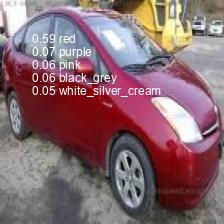

In [10]:
from IPython.display import Image, display

# Replace 'result1.jpg' with the actual filename of your result image
image_path = '/content/yolov5/runs/predict-cls/exp/1.jpg'
display(Image(image_path))